In [106]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [107]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **EDA**

In [108]:
#Duplicates
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [109]:
df = df.drop_duplicates()

In [110]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [111]:
df["Type"].unique()

array([1, 2, 3, 5, 6, 7])

In [112]:
#StandardScaler: Standardization
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
df[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]] = se.fit_transform(df[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]])
df

<ipython-input-112-26ae019b7f89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]] = se.fit_transform(df[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]])


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,1
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,1
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,1
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,1
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,7
210,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,7
211,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,7
212,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,7


In [113]:
#independent and dependent features

x = df.iloc[:, 0:-1]
y = df.iloc[:,-1]
#split into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=20)

# **K nearest neighbour model**

In [114]:
kfold = KFold(n_splits=10)

In [115]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, x, y, cv=kfold)
results

array([0.5       , 0.77272727, 0.68181818, 0.9047619 , 0.47619048,
       0.28571429, 0.38095238, 0.        , 0.19047619, 0.04761905])

In [116]:
print(results.mean())

0.4240259740259741


In [117]:
#fitting the model to training data
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=12)

In [118]:
#Predict value using test value
ypred = model.predict(xtest)
ypred

array([1, 1, 1, 2, 7, 2, 1, 2, 2, 1, 5, 2, 5, 1, 2, 1, 1, 2, 2, 2, 5, 2,
       1, 2, 7, 2, 2, 7, 2, 1, 2, 1, 7, 1, 2, 1, 1, 2, 2, 1, 1, 7, 1])

In [119]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.41      0.78      0.54         9
           2       0.67      0.63      0.65        19
           3       0.00      0.00      0.00         5
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         1
           7       1.00      0.71      0.83         7

    accuracy                           0.58        43
   macro avg       0.40      0.44      0.40        43
weighted avg       0.56      0.58      0.55        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
model.score(xtrain,ytrain)

0.7

# **Grid Search for Algorithm Tuning**

In [121]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV


In [122]:
n = np.array(range(1,40)) # k value from 1 to 40
params = dict(n_neighbors=n)

In [123]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [129]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


# **Visualizing the CV results**

In [125]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 40)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

1     0.689610
2     0.670996
4     0.666667
3     0.656926
5     0.651948
0     0.647403
9     0.642857
7     0.638095
8     0.633333
11    0.629004
6     0.628788
10    0.624026
12    0.609957
13    0.609957
26    0.596320
19    0.591775
18    0.591558
14    0.591126
20    0.587013
33    0.586580
15    0.586580
37    0.586364
16    0.581818
36    0.581818
34    0.581818
23    0.577489
24    0.577489
38    0.576840
25    0.572944
22    0.572944
21    0.572944
27    0.572727
28    0.572511
17    0.572511
35    0.567749
32    0.563203
29    0.562987
30    0.558658
31    0.558442
dtype: float64

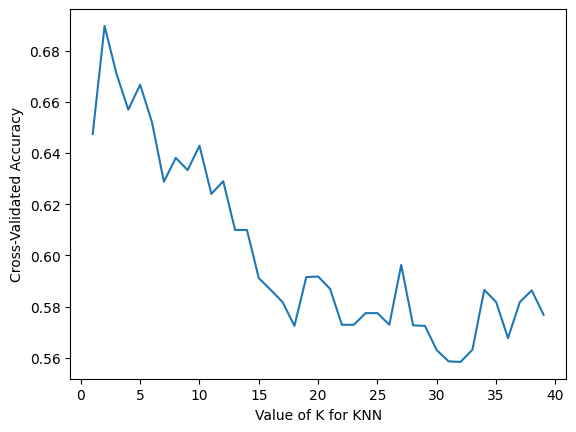

In [126]:
import matplotlib.pyplot as plt

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# **K nearest neighbour model k=1**

In [130]:
model = KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model, x, y, cv=kfold)
results

array([0.77272727, 0.90909091, 0.81818182, 0.76190476, 0.47619048,
       0.33333333, 0.47619048, 0.14285714, 0.19047619, 0.95238095])

In [131]:
print(results.mean())

0.5833333333333334
